Import Drive

In [1]:
from google.colab import drive
drive.mount('content')

Mounted at content


Necessary Packages are imported

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

Load the datasets

In [3]:
train = pd.read_csv(r"/content/content/MyDrive/Job A Thon/train_s3TEQDk.csv")
test = pd.read_csv(r"/content/content/MyDrive/Job A Thon/test_mSzZ8RL.csv")

Data Cleaning

In [4]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [6]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [7]:
test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


Check for null values

In [10]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


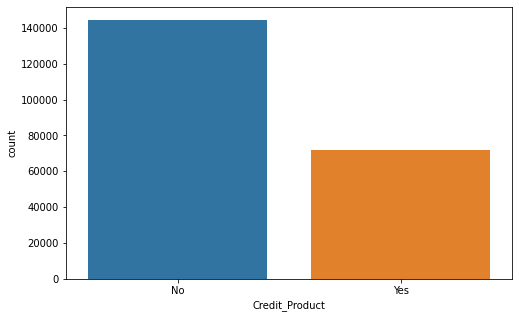

In [12]:
plot.figure(figsize=(8,5))
sns.countplot(train["Credit_Product"])

Null values are filled with imputation(mode) but to balance i used Yes instead of No

In [13]:
train["Credit_Product"] = train["Credit_Product"].fillna("Yes")
test["Credit_Product"] = test["Credit_Product"].fillna("Yes")

In [14]:
(train["Credit_Product"].isnull().sum(),test["Credit_Product"].isnull().sum())

(0, 0)

In [14]:
train = train.drop(columns = "ID",axis=1)

In [15]:
ID = test["ID"]
test = test.drop(columns = "ID", axis=1)

Data Visualization

<Figure size 576x360 with 0 Axes>

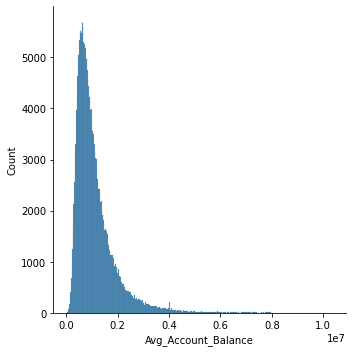

In [16]:
plot.figure(figsize=(8,5))
sns.displot(train["Avg_Account_Balance"])

As we can see its right skewed ...log transformation is applied

In [17]:
train["Avg_Account_Balance"] = np.log(train.Avg_Account_Balance)

<Figure size 576x360 with 0 Axes>

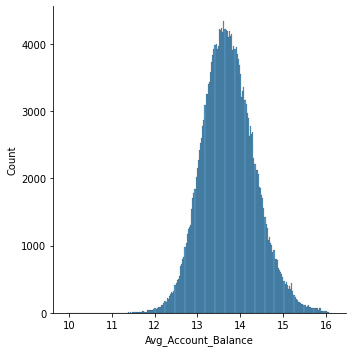

In [18]:
plot.figure(figsize=(8,5))
sns.displot(train["Avg_Account_Balance"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


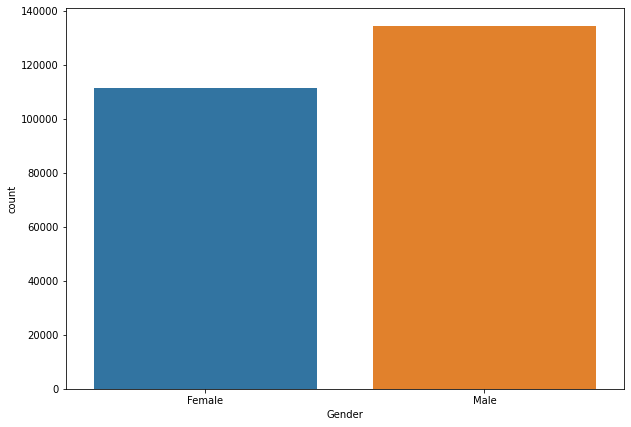

In [19]:
plot.figure(figsize=(10,7))
sns.countplot(train["Gender"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


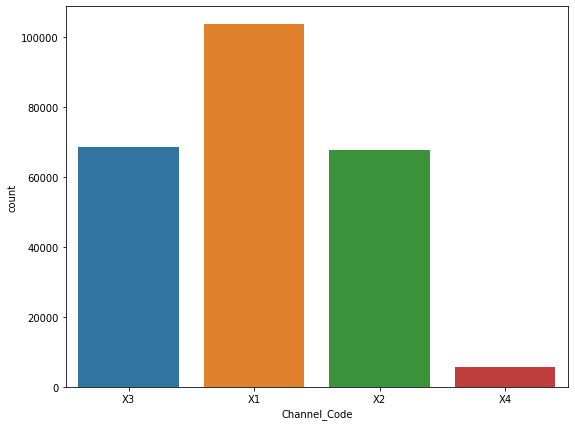

In [20]:
plot.figure(figsize=(9,7))
sns.countplot(train["Channel_Code"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


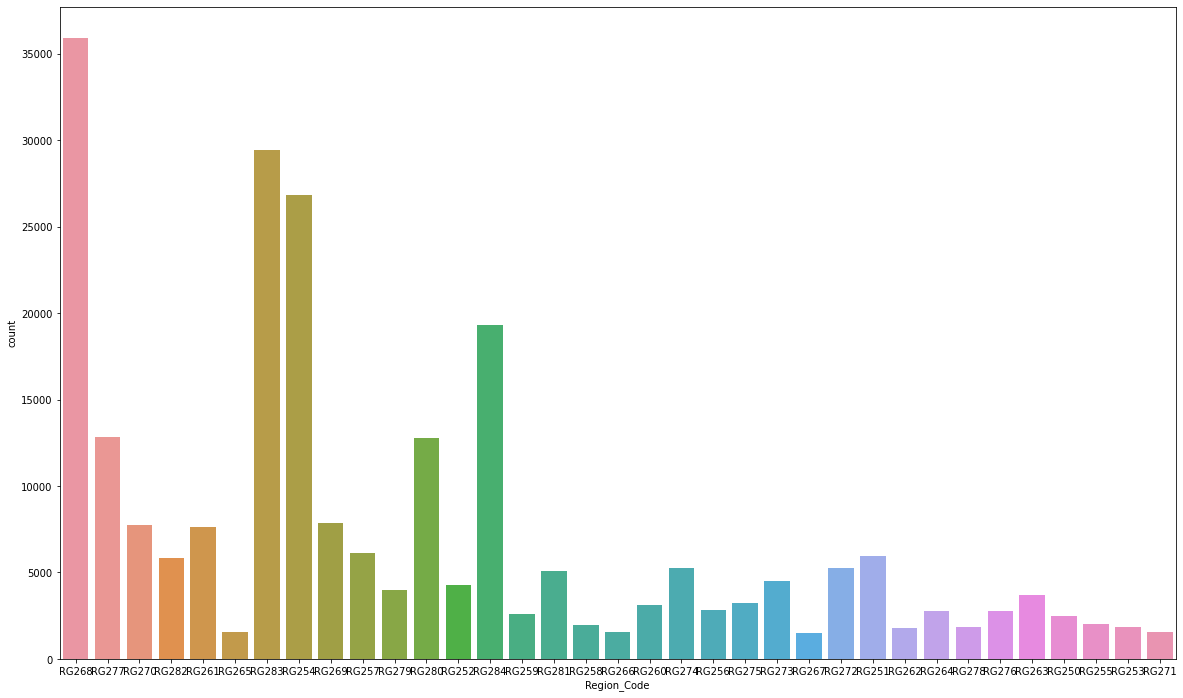

In [21]:
plot.figure(figsize=(20,12))
sns.countplot(train["Region_Code"])

Categorical data is labelled and then coverted into 0 and 1 using dummy variables

In [22]:
#Numbering for categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cng_col = ['Region_Code','Gender','Occupation','Channel_Code','Credit_Product','Is_Active']
for i in cng_col:
    train[i] = le.fit_transform(train[i])
    
#One Hot Coding:
train = pd.get_dummies(train, columns=['Region_Code','Gender','Occupation','Channel_Code','Credit_Product','Is_Active'],drop_first=True)

In [23]:
#Numbering for categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cng_col = ['Region_Code','Gender','Occupation','Channel_Code','Credit_Product','Is_Active']
for i in cng_col:
    test[i] = le.fit_transform(test[i])
    
#One Hot Coding:
test = pd.get_dummies(test, columns=['Region_Code','Gender','Occupation','Channel_Code','Credit_Product','Is_Active'],drop_first=True)

In [24]:
test["Avg_Account_Balance"] = np.log(test.Avg_Account_Balance)

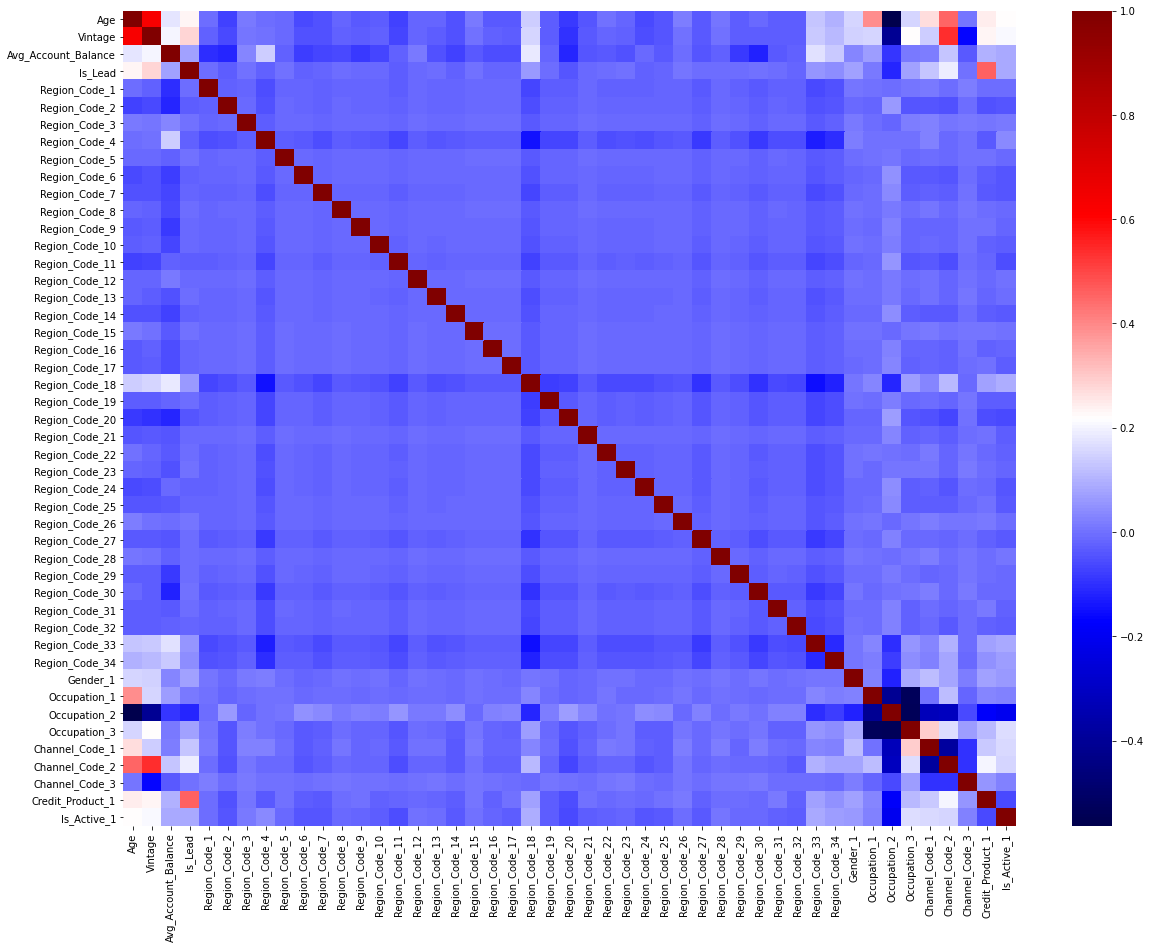

In [25]:
plot.figure(figsize=(20,15))
sns.heatmap(train.corr(),cmap='seismic')

In [26]:
X = train.drop(columns = "Is_Lead" ,axis =1)
y = train["Is_Lead"]

Normalization is used

In [27]:
def normalization(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [28]:
X = normalization(X)
test = normalization(test)

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state =123)

Model Building

In [31]:
def model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=2500, n_jobs=3, random_state=25,max_depth=15, min_samples_leaf=6).fit(X_train, y_train)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [34]:
pred = rf_clf.predict(X_valid)

In [35]:
model_report(y_valid,pred)

Accuracy =  0.8250495130090344
Precision =  0.6610145032109099
Recall =  0.5277073732718894
F1 Score =  0.5868861911015728


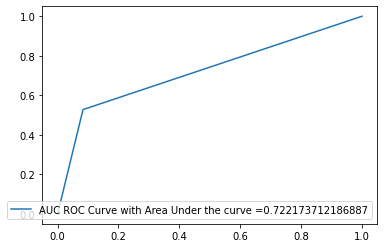

In [36]:
fpr, tpr, thresholds = roc_curve(y_valid, pred)
auc = roc_auc_score(y_valid, pred)
plot.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plot.legend(loc=4)
plot.show()

In [37]:
confusion_matrix(y_valid, rf_clf.predict(X_valid))
accuracy_score(y_valid, rf_clf.predict(X_valid))

0.8250495130090344

In [38]:
randomclassifier = pd.DataFrame(ID,columns=["ID","Is_Lead"])
randomclassifier.Is_Lead = rf_clf.predict(test)

In [40]:
randomclassifier.to_csv("submissionrandom.csv")

XGBClassifier

In [42]:
from xgboost import XGBClassifier
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.05,  
                      colsample_bytree = 0.3,
                      subsample = 0.6,
                      objective='binary:logistic', 
                      n_estimators=3600, 
                      reg_alpha = 0.3,
                      max_depth=12, 
                      gamma=10).fit(X_train, y_train)


In [43]:
predv = model.predict(X_valid)

In [44]:
model_report(y_valid,predv)

Accuracy =  0.8258362950704035
Precision =  0.6559288128578327
Recall =  0.5477534562211982
F1 Score =  0.596980255516841


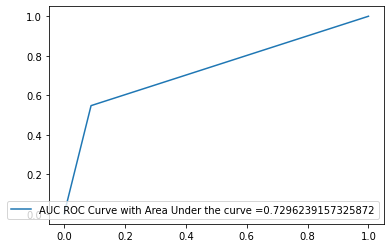

In [45]:
fpr, tpr, thresholds = roc_curve(y_valid, predv)
auc = roc_auc_score(y_valid, predv)
plot.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plot.legend(loc=4)
plot.show()

In [47]:
pred2 = model.predict(test)

In [49]:
submission = pd.DataFrame(ID,columns=["ID","Is_Lead"])
submission.Is_Lead = pred2


In [50]:
submission.to_csv("submissionxg.csv")